# Using projections
## Simple area calculation example

In [1]:
import pandas as pd
import geopandas as gpd
import pyproj
from pyproj import CRS
import matplotlib.pyplot as plt

In [2]:
world = gpd.read_file('../lecture_1/data/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp')

In [3]:
world.columns

Index(['ne_10m_adm', 'ScaleRank', 'LabelRank', 'FeatureCla', 'OID_',
       'SOVEREIGNT', 'SOV_A3', 'ADM0_DIF', 'LEVEL', 'TYPE', 'ADMIN', 'ADM0_A3',
       'GEOU_DIF', 'GEOUNIT', 'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'NAME',
       'ABBREV', 'POSTAL', 'NAME_FORMA', 'TERR_', 'NAME_SORT', 'MAP_COLOR',
       'POP_EST', 'GDP_MD_EST', 'FIPS_10_', 'ISO_A2', 'ISO_A3', 'ISO_N3',
       'geometry'],
      dtype='object')

In [4]:
world.shape

(253, 32)

In [5]:
world.drop_duplicates(subset='ne_10m_adm').shape

(253, 32)

In [6]:
world = world[['ne_10m_adm', 'ADMIN', 'geometry']].copy()
world.columns = ['iso', 'country', 'geometry']

<AxesSubplot:>

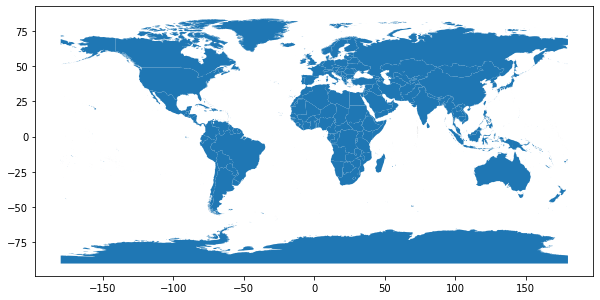

In [7]:
world.plot(figsize=(10, 6))

In [8]:
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
world.head()

,iso,country,geometry
0,ABW,Aruba,"POLYGON ((-69.87609 12.42720, -69.88738 12.417..."
1,AFG,Afghanistan,"POLYGON ((71.02458 38.44192, 71.03296 38.42365..."
2,AGO,Angola,"MULTIPOLYGON (((11.74148 -16.72017, 11.78024 -..."
3,AIA,Anguilla,"MULTIPOLYGON (((-63.03690 18.21277, -63.09881 ..."
4,ALB,Albania,"POLYGON ((20.06496 42.54676, 20.08563 42.53001..."


# Pick a projection

- List of available projections here: https://techoverflow.net/2019/06/22/how-to-list-available-projections-in-pyproj/
- Another exhaustive list: https://developers.arcgis.com/rest/services-reference/using-spatial-references.htm
- Choose wisely! https://xkcd.com/977/

Some equal area projections

https://en.wikipedia.org/wiki/Equal-area_map

# World cylindical equal area projection

In [10]:
wcea_crs = CRS.from_string("esri:54034")

In [11]:
world_cea = world.to_crs(crs=wcea_crs)

<AxesSubplot:>

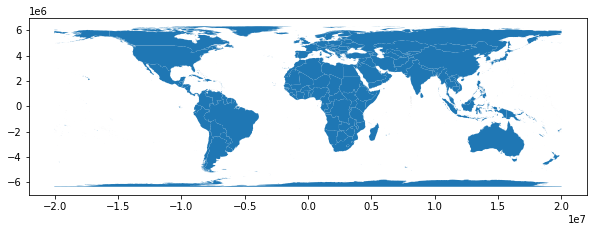

In [12]:
world_cea.plot(figsize=(10, 6))

In [13]:
world_cea.crs

<Projected CRS: ESRI:54034>
Name: World_Cylindrical_Equal_Area
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Coordinate Operation:
- name: World_Cylindrical_Equal_Area
- method: Lambert Cylindrical Equal Area
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

**Now we can calculate areas!**

In [14]:
world_cea['area_sqkm_cea'] = world_cea['geometry'].area / 10**6

In [15]:
world_cea.head()

,iso,country,geometry,area_sqkm_cea
0,ABW,Aruba,"POLYGON ((-7778570.967 1363661.939, -7779827.9...",1.697625e+02
1,AFG,Afghanistan,"POLYGON ((7906420.546 3945686.255, 7907352.466...",6.421811e+05
2,AGO,Angola,"MULTIPOLYGON (((1307056.066 -1823364.546, 1311...",1.244785e+06
3,AIA,Anguilla,"MULTIPOLYGON (((-7017235.268 1980983.551, -702...",8.217755e+01
4,ALB,Albania,"POLYGON ((2233620.650 4292737.291, 2235921.688...",2.832650e+04


note how the polyon definitions have changed

In [16]:
world_cea[world_cea.iso == 'CHE']

,iso,country,geometry,area_sqkm_cea
39,CHE,Switzerland,"POLYGON ((1032289.160 4693622.852, 1062823.930...",41431.973026


https://en.wikipedia.org/wiki/Switzerland

not too bad...

We can also identify projections by (European Petroleum Survey Group) EPSG numbers for the purposes of `to_crs()`. For instance, we can get almost the same projection as follows

In [17]:
world_lcea = world.to_crs(epsg=3410)
world_lcea.crs

<Projected CRS: EPSG:3410>
Name: NSIDC EASE-Grid Global
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 86°S and 86°N.
- bounds: (-180.0, -86.0, 180.0, 86.0)
Coordinate Operation:
- name: US NSIDC Equal Area global projection
- method: Lambert Cylindrical Equal Area (Spherical)
Datum: Not specified (based on International 1924 Authalic Sphere)
- Ellipsoid: International 1924 Authalic Sphere
- Prime Meridian: Greenwich

In [18]:
world_lcea['area_sqkm_cea'] = world_lcea['geometry'].area / 10**6
world_lcea[world_lcea.iso == 'CHE']

,iso,country,geometry,area_sqkm_cea
39,CHE,Switzerland,"POLYGON ((893020.240 5437047.642, 919435.481 5...",41325.336064


We can also get a bit more concise information on the crs

In [19]:
print(world_lcea.crs)

epsg:3410


In [20]:
print(world_cea.crs)

esri:54034


In [21]:
print(world.crs)

epsg:4326


`geopandas` uses `pyproj` (we used `pyproj.CRS` above to define a crs from a string) to handle co-ordinate reference systems. `pyproj` is a wrapper around `PROJ` (see here for the project: https://proj.org/)

Suppose we wanted to get an epsg code for some projection.

In [22]:
CRS.from_string('esri:54034').to_epsg()

We can use the `min_confidence` parameter to get the closest match

In [23]:
CRS.from_string('esri:54034').to_epsg(min_confidence=25)

6933

In [24]:
world_lcea = world.to_crs(epsg=6933)
world_lcea.crs

<Projected CRS: EPSG:6933>
Name: WGS 84 / NSIDC EASE-Grid 2.0 Global
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 86°S and 86°N.
- bounds: (-180.0, -86.0, 180.0, 86.0)
Coordinate Operation:
- name: US NSIDC EASE-Grid 2.0 Global
- method: Lambert Cylindrical Equal Area
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [25]:
world_lcea['area_sqkm_cea'] = world_lcea['geometry'].area / 10**6
world_lcea[world_lcea.iso == 'CHE']

,iso,country,geometry,area_sqkm_cea
39,CHE,Switzerland,"POLYGON ((894737.665 5415191.720, 921203.707 5...",41431.973026


# World sinusoidal projection

In [26]:
wsea_crs = CRS.from_string('esri:54008')

In [27]:
world_sea = world.to_crs(crs=wsea_crs)

<AxesSubplot:>

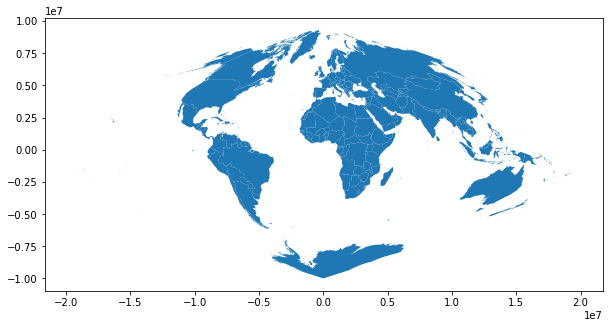

In [28]:
world_sea.plot(figsize=(10, 6))

In [29]:
world_sea['area_sqkm_sea'] = world_sea['geometry'].area / 10**6

In [30]:
world_sea.head()

,iso,country,geometry,area_sqkm_sea
0,ABW,Aruba,"POLYGON ((-7597498.562 1374343.176, -7599006.7...",1.697644e+02
1,AFG,Afghanistan,"POLYGON ((6200643.078 4256551.236, 6202936.616...",6.421813e+05
2,AGO,Angola,"MULTIPOLYGON (((1252142.373 -1849338.664, 1255...",1.244785e+06
3,AIA,Anguilla,"MULTIPOLYGON (((-6667869.464 2014531.151, -667...",8.217720e+01
4,ALB,Albania,"POLYGON ((1648090.114 4712370.004, 1650228.758...",2.832656e+04


# Eckert II

In [31]:
eckert_crs = CRS.from_string('esri:54014')

In [32]:
world_eckert = world.to_crs(crs=eckert_crs)

<AxesSubplot:>

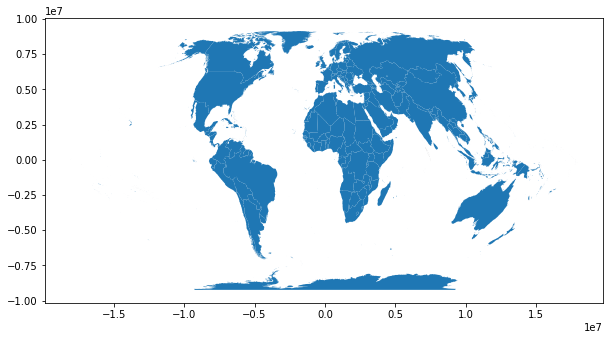

In [33]:
world_eckert.plot(figsize=(10, 6))

In [34]:
world_eckert['area_sqkm_eckert2'] = world_eckert['geometry'].area / 10**6

In [35]:
world_eckert.head()

,iso,country,geometry,area_sqkm_eckert2
0,ABW,Aruba,"POLYGON ((-6562765.334 1555304.567, -6564309.2...",1.707999e+02
1,AFG,Afghanistan,"POLYGON ((5321593.706 4974217.265, 5323154.833...",6.438309e+05
2,AGO,Angola,"MULTIPOLYGON (((1066410.664 -2112559.801, 1069...",1.252371e+06
3,AIA,Anguilla,"MULTIPOLYGON (((-5656836.355 2307982.369, -566...",8.262123e+01
4,ALB,Albania,"POLYGON ((1444704.353 5500664.648, 1446429.572...",2.835244e+04


# Comparing areas

In [36]:
world_cea = world_cea[['iso', 'area_sqkm_cea']].copy()
world_sea = world_sea[['iso', 'area_sqkm_sea']].copy()
world_eckert = world_eckert[['iso', 'area_sqkm_eckert2']].copy()
df = pd.merge(pd.merge(world_cea, world_sea, on='iso', how='inner'), world_eckert, how='inner')

In [37]:
df.head(10)

,iso,area_sqkm_cea,area_sqkm_sea,area_sqkm_eckert2
0,ABW,1.697625e+02,1.697644e+02,1.707999e+02
1,AFG,6.421811e+05,6.421813e+05,6.438309e+05
2,AGO,1.244785e+06,1.244785e+06,1.252371e+06
3,AIA,8.217755e+01,8.217720e+01,8.262123e+01
4,ALB,2.832650e+04,2.832656e+04,2.835244e+04
5,ALD,8.318368e+02,8.318218e+02,8.290155e+02
6,AND,4.522394e+02,4.522403e+02,4.525055e+02
7,ARE,7.124601e+04,7.124573e+04,7.156838e+04
8,ARG,2.783156e+06,2.783152e+06,2.789611e+06
9,ARM,2.958824e+04,2.958825e+04,2.962115e+04


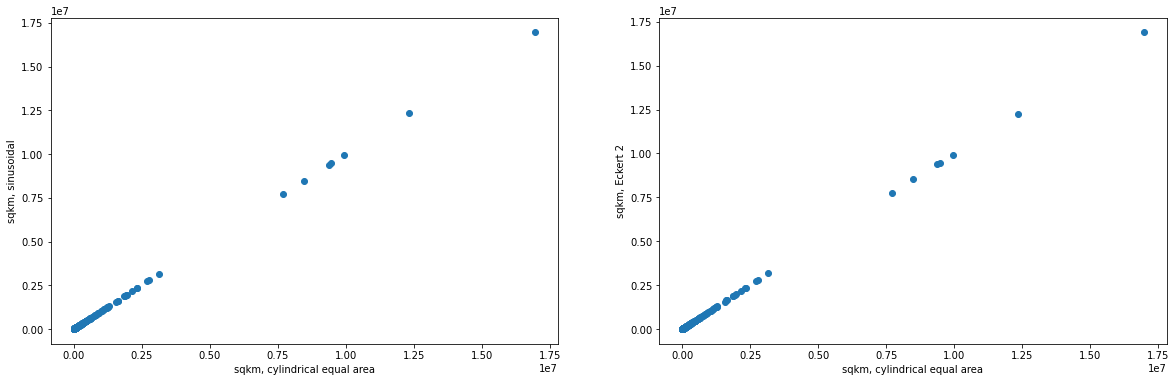

In [38]:
f, ax = plt.subplots(1, 2, figsize=(20, 6))
ax[0].scatter(df.area_sqkm_cea, df.area_sqkm_sea)
ax[0].set_xlabel('sqkm, cylindrical equal area')
ax[0].set_ylabel('sqkm, sinusoidal')

ax[1].scatter(df.area_sqkm_cea, df.area_sqkm_eckert2)
ax[1].set_xlabel('sqkm, cylindrical equal area')
ax[1].set_ylabel('sqkm, Eckert 2')

plt.show()